In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Admission_Predict.csv")

In [3]:
dataset[:10]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
dataset.isnull().values.any()

False

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [7]:
X = dataset.iloc[:,1:-2]
y = dataset.iloc[:, -1]

In [8]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [9]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [11]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
280,311,102,3,4.5,4.0,8.64
190,324,111,5,4.5,4.0,9.16
103,317,104,2,4.5,4.0,8.47
201,315,110,2,3.5,3.0,8.46
402,324,109,3,3.5,3.0,8.94


In [12]:
y_train.head()

280    0.68
190    0.90
103    0.57
201    0.72
402    0.78
Name: Chance of Admit , dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
lm.intercept_

-1.4729195546283567

In [16]:
df=pd.DataFrame(lm.coef_,dataset.columns[1:-2],columns=["Coefficent"])
df

,Coefficent
GRE Score,0.002473
TOEFL Score,0.002563
University Rating,0.007640
SOP,0.002022
LOR,0.015366
CGPA,0.122648


In [17]:
lm.predict(X_test)

array([0.97021982, 0.54480462, 0.53525624, 0.5320182 , 0.8324112 ,
       0.50603162, 0.60388703, 0.49190984, 0.84341745, 0.62660808,
       0.61784492, 0.76119225, 0.62577937, 0.72015713, 0.90648051,
       0.63721791, 0.53463886, 0.66936342, 0.65247102, 0.79805305,
       0.62871822, 0.83578656, 0.64090729, 0.62458925, 0.79038794,
       0.70939617, 0.67213802, 0.6120727 , 0.96974245, 0.46849173,
       0.452057  , 0.51604496, 0.63022481, 0.56021292, 0.62588287,
       0.66200451, 0.58195049, 0.78852101, 0.59005366, 0.86298779,
       0.76372127, 0.66439515, 0.62548317, 0.79053502, 0.6770252 ,
       0.79203793, 0.69363522, 0.5187931 , 0.54967608, 0.50410958,
       0.73852718, 0.69863409, 0.8542972 , 0.95824648, 0.76510026,
       0.886262  , 0.6953468 , 0.99440404, 0.73504541, 0.52829783,
       0.72952715, 0.62929649, 0.62808978, 0.82004862, 0.59608922,
       0.66000751, 0.53067031, 0.8653338 , 0.80794361, 0.70269728,
       0.64617718, 0.98507875, 0.6518269 , 0.80942644, 0.71903

In [18]:
y_pred=lm.predict(X_test)
y_pred

array([0.97021982, 0.54480462, 0.53525624, 0.5320182 , 0.8324112 ,
       0.50603162, 0.60388703, 0.49190984, 0.84341745, 0.62660808,
       0.61784492, 0.76119225, 0.62577937, 0.72015713, 0.90648051,
       0.63721791, 0.53463886, 0.66936342, 0.65247102, 0.79805305,
       0.62871822, 0.83578656, 0.64090729, 0.62458925, 0.79038794,
       0.70939617, 0.67213802, 0.6120727 , 0.96974245, 0.46849173,
       0.452057  , 0.51604496, 0.63022481, 0.56021292, 0.62588287,
       0.66200451, 0.58195049, 0.78852101, 0.59005366, 0.86298779,
       0.76372127, 0.66439515, 0.62548317, 0.79053502, 0.6770252 ,
       0.79203793, 0.69363522, 0.5187931 , 0.54967608, 0.50410958,
       0.73852718, 0.69863409, 0.8542972 , 0.95824648, 0.76510026,
       0.886262  , 0.6953468 , 0.99440404, 0.73504541, 0.52829783,
       0.72952715, 0.62929649, 0.62808978, 0.82004862, 0.59608922,
       0.66000751, 0.53067031, 0.8653338 , 0.80794361, 0.70269728,
       0.64617718, 0.98507875, 0.6518269 , 0.80942644, 0.71903

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04625502657590715
Mean Squared Error: 0.0037341461131884246
Root Mean Squared Error: 0.06110766002056064


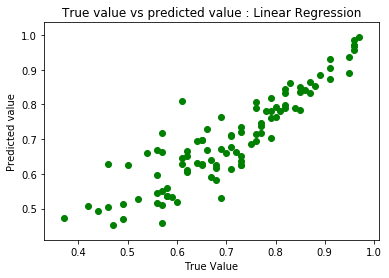

In [20]:
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("True Value") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

In [21]:
result=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result[:10]

,Actual,Predicted
130,0.96,0.970220
291,0.56,0.544805
37,0.58,0.535256
239,0.59,0.532018
191,0.87,0.832411
420,0.42,0.506032
323,0.62,0.603887
27,0.44,0.491910
211,0.82,0.843417
484,0.73,0.626608


In [22]:
accuracy=lm.score(X_test,y_test)
accuracy*100

80.660950563636

In [23]:
from sklearn.externals import joblib

In [24]:
joblib.dump(lm, 'usa-graduate-admission.pkl')

['usa-graduate-admission.pkl']

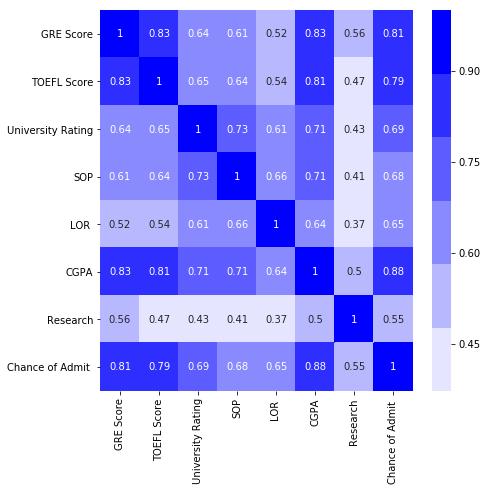

In [25]:
dataset1=dataset.iloc[:,1:]
plt.figure(figsize=(7,7))
sns.heatmap(dataset1.corr(),annot=True,cmap=sns.light_palette("blue"))

In [26]:
X = dataset[["GRE Score","TOEFL Score","CGPA","University Rating","SOP"]]
y = dataset.iloc[:, -1]

In [27]:
X.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP
0,337,118,9.65,4,4.5
1,324,107,8.87,4,4.0
2,316,104,8.00,3,3.0
3,322,110,8.67,3,3.5
4,314,103,8.21,2,2.0


In [28]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [30]:
lm1=LinearRegression()

In [31]:
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lm1.intercept_

-1.4714757834650594

In [33]:
df=pd.DataFrame(lm.coef_,dataset.columns[1:-2],columns=["Coefficent"])
df

,Coefficent
GRE Score,0.002473
TOEFL Score,0.002563
University Rating,0.007640
SOP,0.002022
LOR,0.015366
CGPA,0.122648


In [34]:
y_pred=lm1.predict(X_test)
y_pred

array([0.96825314, 0.5511884 , 0.53621516, 0.53726164, 0.81818007,
       0.49792116, 0.60759283, 0.48800595, 0.84946607, 0.62850841,
       0.60710979, 0.75170536, 0.63827389, 0.71389365, 0.89581963,
       0.64116302, 0.50104891, 0.67294685, 0.65239087, 0.78322901,
       0.63245659, 0.85168825, 0.61567552, 0.61972438, 0.79452458,
       0.71380229, 0.66668454, 0.61444925, 0.9639923 , 0.48031834,
       0.45498542, 0.51410352, 0.62746303, 0.55390422, 0.63559213,
       0.66696021, 0.57659056, 0.77826425, 0.59574417, 0.85061365,
       0.77050142, 0.66334591, 0.61609741, 0.79420494, 0.66995997,
       0.78960268, 0.69456398, 0.51279724, 0.52852298, 0.52297928,
       0.74787276, 0.68703028, 0.84634819, 0.94966772, 0.76229849,
       0.8885628 , 0.70139566, 0.98568121, 0.7360928 , 0.53386092,
       0.74129923, 0.65018669, 0.63158698, 0.82308566, 0.57850177,
       0.64465633, 0.54337517, 0.866983  , 0.81818892, 0.69101044,
       0.65540654, 0.98183637, 0.63783612, 0.8164012 , 0.72536

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04798317301215623
Mean Squared Error: 0.003970011051634425
Root Mean Squared Error: 0.06300802370836928


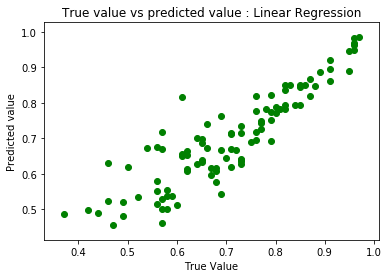

In [36]:
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("True Value") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

In [37]:
result=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result[:10]

,Actual,Predicted
130,0.96,0.968253
291,0.56,0.551188
37,0.58,0.536215
239,0.59,0.537262
191,0.87,0.818180
420,0.42,0.497921
323,0.62,0.607593
27,0.44,0.488006
211,0.82,0.849466
484,0.73,0.628508


In [38]:
accuracy=lm1.score(X_test,y_test)
accuracy*100

79.43941193963788

In [39]:
from sklearn.externals import joblib
joblib.dump(lm1, 'usa-graduate-admission.pkl')

['usa-graduate-admission.pkl']